In [53]:
import main as m
import homography as h
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from PIL import Image

In [2]:
# Ordre
# haut, droite
# bas, droite
# haut gauche
# bas droite

PE = np.array([
    [890, 30],
    [820, 960],
    [360, 290],
    [150, 760]
])
margin = 20
PS = np.array([
    [1024-margin, margin],
    [1024-margin, 1024-margin],
    [margin, margin],
    [margin, 1024-margin]
])

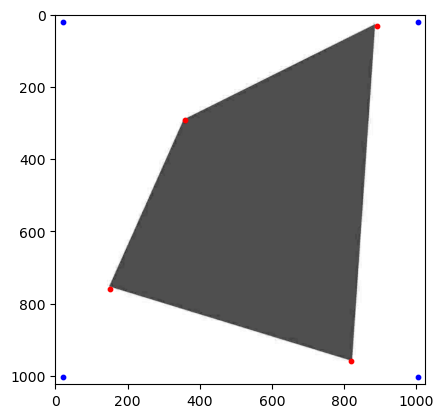

In [3]:
xe, ye = PE.T
xs, ys = PS.T

I = Image.open("images/Projective1.jpg", mode="r").convert('L')
Img = m.Compresser(np.array(I), 1)
plt.imshow(Img, cmap='gray')
plt.scatter(xe, ye, 10, color="red")
plt.scatter(xs, ys, 10, color="blue")
plt.show()

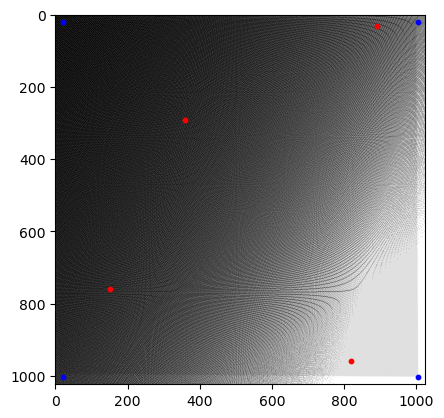

In [4]:
HImage, e_suraffectations = h.TransformationProjective(Img, PE, PS)
plt.imshow(HImage, cmap='gray')
plt.scatter(xe, ye, 10, color="red")
plt.scatter(xs, ys, 10, color="blue")
plt.show()

In [5]:
e_nonaffecte = h.ErrorNonAffected(HImage, [[margin, margin],
                                   [1024-margin, margin],
                                   [margin, 1024-margin],
                                   [1024-margin, 1024-margin]])

In [6]:
print("Pourcentage non-affecté : " + str(e_nonaffecte/(1024-2*margin)**2))

Pourcentage non-affecté : 0.6078712654504593


In [7]:
def MakeImage(HImg, margin):
    x, y = HImg.shape
    F = np.zeros((x-2*margin, y-2*margin))
    xi, yi = F.shape
    for i in range(xi):
        for j in range(yi):
            F[i,j] = HImg[i+margin, j+margin]
    return F

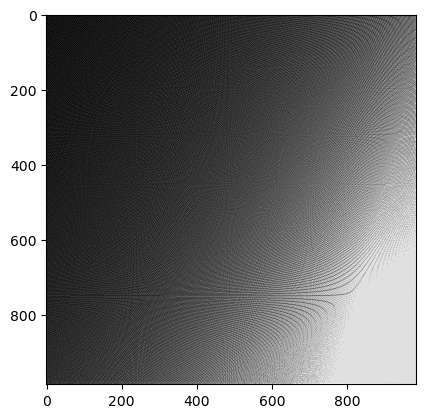

In [8]:
F = MakeImage(HImage, margin)
plt.imshow(F, cmap='gray')

In [100]:
def DensityError(I, N : int):
    """
    I : Image
    N : Nb sections
    """
    x, y = I.shape
    NBMAX = (x//N)*(y//N)
    l_X = np.linspace(0, x, x//N)
    l_Y = np.linspace(0, y, y//N)
    X, Y = np.meshgrid(l_X, l_Y)
    Z = np.zeros((x//N, y//N))
    for i in range(x):
        for j in range(y):
            if I[i,j] < 10 and (i//N < x//N) and (j//N < y//N):
                Z[i//N,j//N] += 1
    return X, Y, Z, NBMAX

In [101]:
N = 50
X, Y, Z, NBMAX = DensityError(F, N)

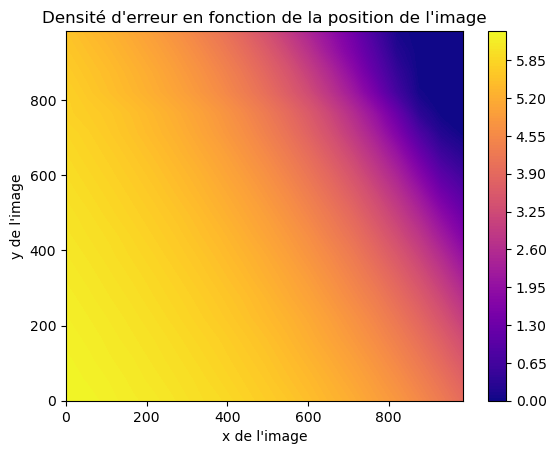

In [103]:
plt.figure()
plt.contourf(X,Y,(1/NBMAX)*Z, 150, cmap="plasma")
plt.xlabel("x de l'image")
plt.ylabel("y de l'image")
plt.title("Densité d'erreur en fonction de la position de l'image")
plt.colorbar()
plt.show()